In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data=pd.read_csv("globalterrorism.csv", encoding="latin1")
df=pd.DataFrame(data)
print("\ndata has been succesfully imported")
df.head()


data has been succesfully imported


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,76,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11960 entries, 0 to 11959
Columns: 135 entries, eventid to related
dtypes: float64(63), int64(18), object(54)
memory usage: 12.3+ MB


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df.shape

(11960, 135)

In [ ]:
for i in data.columns:
  print(i,end=" , ")


eventid , iyear , imonth , iday , approxdate , extended , resolution , country , country_txt , region , region_txt , provstate , city , latitude , longitude , specificity , vicinity , location , summary , crit1 , crit2 , crit3 , doubtterr , alternative , alternative_txt , multiple , success , suicide , attacktype1 , attacktype1_txt , attacktype2 , attacktype2_txt , attacktype3 , attacktype3_txt , targtype1 , targtype1_txt , targsubtype1 , targsubtype1_txt , corp1 , target1 , natlty1 , natlty1_txt , targtype2 , targtype2_txt , targsubtype2 , targsubtype2_txt , corp2 , target2 , natlty2 , natlty2_txt , targtype3 , targtype3_txt , targsubtype3 , targsubtype3_txt , corp3 , target3 , natlty3 , natlty3_txt , gname , gsubname , gname2 , gsubname2 , gname3 , gsubname3 , motive , guncertain1 , guncertain2 , guncertain3 , individual , nperps , nperpcap , claimed , claimmode , claimmode_txt , claim2 , claimmode2 , claimmode2_txt , claim3 , claimmode3 , claimmode3_txt , compclaim , weaptype1 , wea

In [ ]:
#selecting only perticular columns
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
#Renaming the columns name
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

In [ ]:
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11960 entries, 0 to 11959
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            11960 non-null  int64  
 1   Month           11960 non-null  int64  
 2   Day             11960 non-null  int64  
 3   Country         11960 non-null  object 
 4   Region          11960 non-null  object 
 5   Province/State  11918 non-null  object 
 6   City            11960 non-null  object 
 7   Latitude        11570 non-null  float64
 8   Longitude       11570 non-null  float64
 9   Location        567 non-null    object 
 10  Summary         888 non-null    object 
 11  Attack Type     11960 non-null  object 
 12  Target Type     11960 non-null  object 
 13  Group Name      11959 non-null  object 
 14  Motive          623 non-null    object 
 15  Weapon Type     11959 non-null  object 
 16  Killed          10425 non-null  float64
 17  Wounded         9095 non-null  

In [ ]:

df.shape

(11960, 19)

In [ ]:
#Looking for null values
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
Province/State       42
City                  0
Latitude            390
Longitude           390
Location          11393
Summary           11072
Attack Type           0
Target Type           0
Group Name            1
Motive            11337
Weapon Type           1
Killed             1535
Wounded            2865
Add Notes         11309
dtype: int64

In [ ]:
#fillin the null values with 0 and creating a new column casualty
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]
df.describe()


,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,11960.000000,11960.000000,11960.000000,11570.000000,11570.000000,11960.000000,11960.000000,11960.000000
mean,1976.726338,6.170569,15.243227,31.330726,-22.842727,0.879097,0.934783,1.813880
std,3.024931,3.338024,8.942614,22.026742,54.525074,5.929225,6.850653,9.788078
min,1970.000000,0.000000,0.000000,-45.867889,-157.818968,0.000000,0.000000,0.000000
25%,1975.000000,3.000000,8.000000,14.622869,-75.416952,0.000000,0.000000,0.000000
50%,1978.000000,6.000000,15.000000,39.930771,-5.956210,0.000000,0.000000,0.000000
75%,1979.000000,9.000000,23.000000,45.434336,11.346518,1.000000,0.000000,1.000000
max,1980.000000,12.000000,31.000000,64.837778,172.636225,422.000000,285.000000,422.000000


In [ ]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


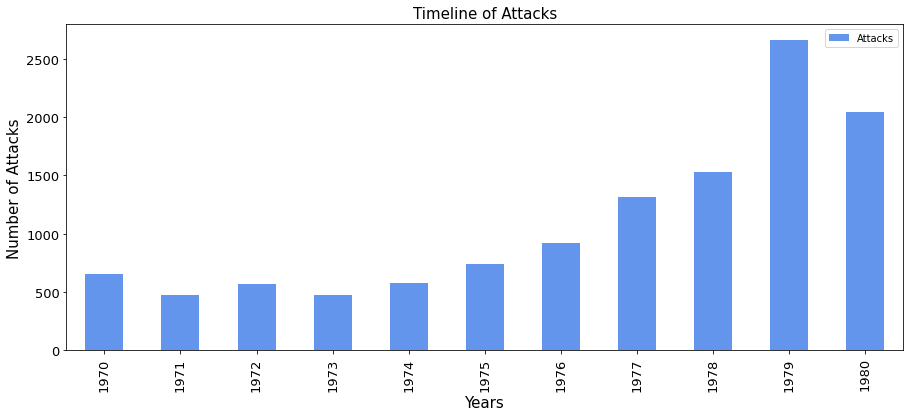

In [ ]:
attacks.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [ ]:
yc=df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


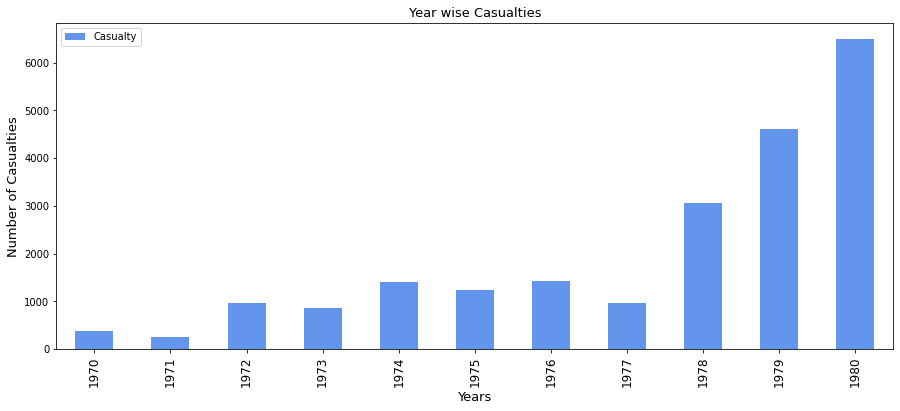

In [ ]:
yc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [ ]:
yk=df[["Year","Killed"]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [ ]:
yw=df[["Year","Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


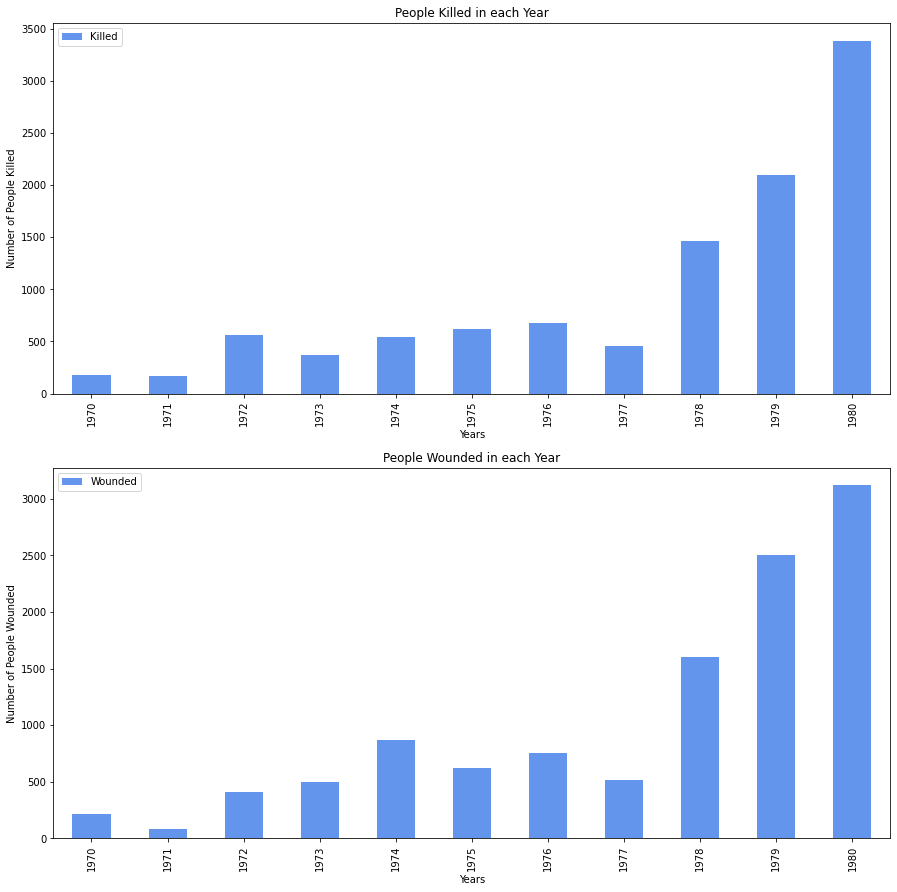

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed graph
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed") 

#Wounded graph
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

plt.show()

In [ ]:
#Region wise attack
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,
1970,1,7,2,12,28,472,65,1,10,3,50
1971,1,5,1,5,55,247,24,0,6,2,125
1972,8,3,0,1,53,73,33,1,16,4,376
1973,1,6,2,1,19,64,83,1,2,4,290
1974,1,11,4,2,42,111,81,2,3,7,317


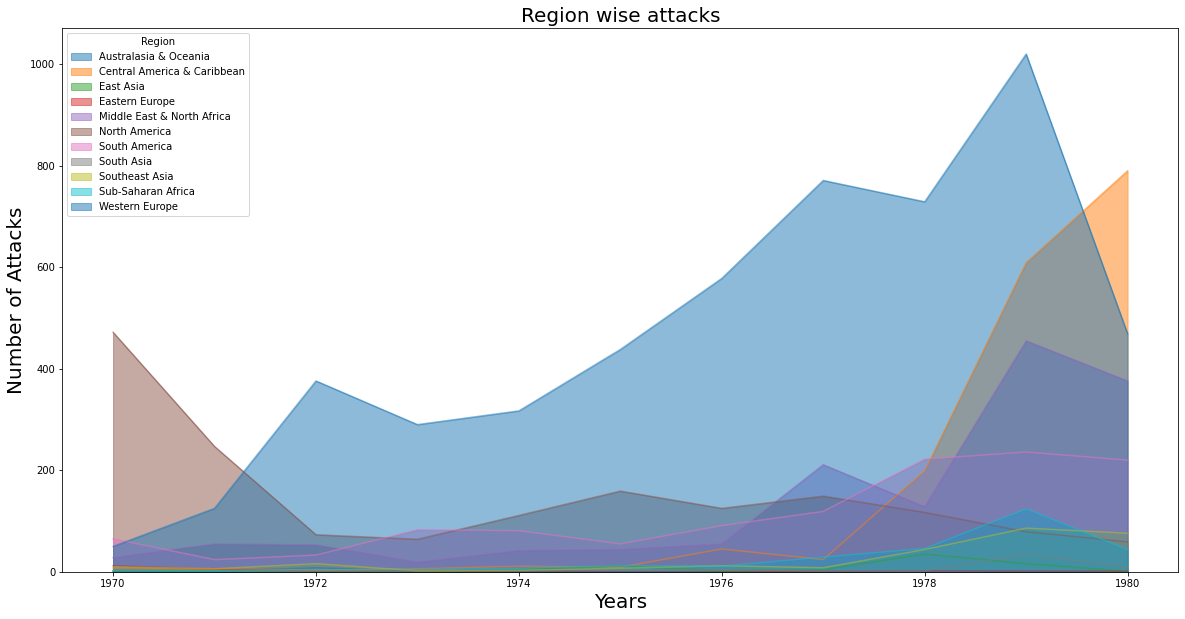

In [ ]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

In [ ]:
#Total Terrorist Attacks in each Region from 1970-2017
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Western Europe                 5163
Central America & Caribbean    1708
North America                  1655
Middle East & North Africa     1466
South America                  1229
Sub-Saharan Africa              286
Southeast Asia                  270
East Asia                        79
South Asia                       60
Eastern Europe                   27
Australasia & Oceania            17
Name: Total, dtype: int64

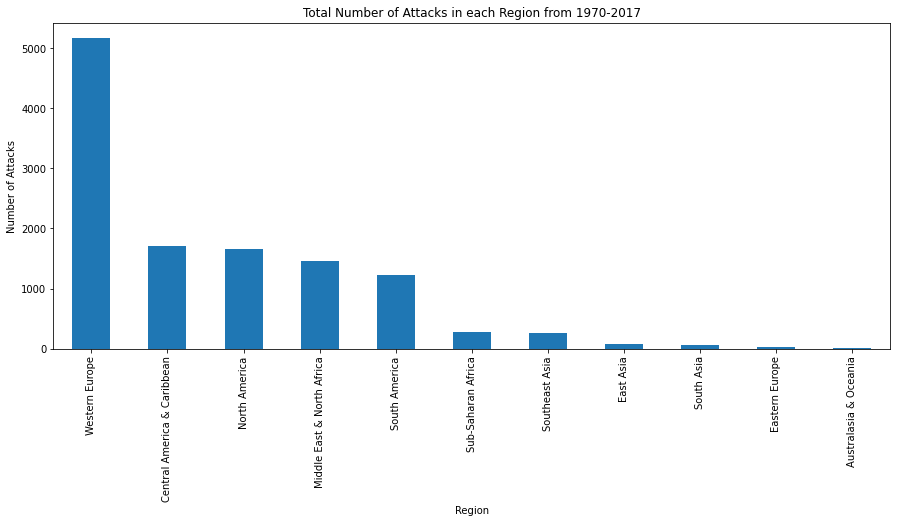

In [ ]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

In [ ]:
#Total Casualties (Killed + Wounded) in each Region
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
Region,
Western Europe,6573.0
Middle East & North Africa,5138.0
Central America & Caribbean,3875.0
Southeast Asia,2264.0
South America,1187.0
Sub-Saharan Africa,1158.0
North America,968.0
South Asia,351.0
East Asia,104.0


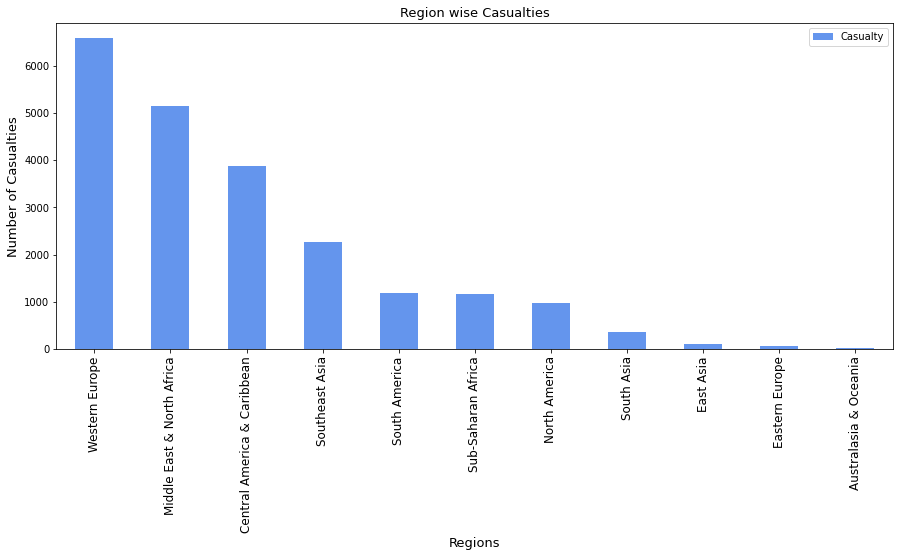

In [ ]:
rc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Region wise Casualties",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [ ]:
#Killed in each region
rk=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

,Killed
Region,
Central America & Caribbean,3107.0
Western Europe,2969.0
Middle East & North Africa,1707.0
Southeast Asia,920.0
South America,738.0
Sub-Saharan Africa,568.0
North America,284.0
South Asia,148.0
East Asia,37.0


In [ ]:
#Wounded in each region
rk=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rk

,Wounded
Region,
Western Europe,3604.0
Middle East & North Africa,3431.0
Southeast Asia,1344.0
Central America & Caribbean,768.0
North America,684.0
Sub-Saharan Africa,590.0
South America,449.0
South Asia,203.0
East Asia,67.0


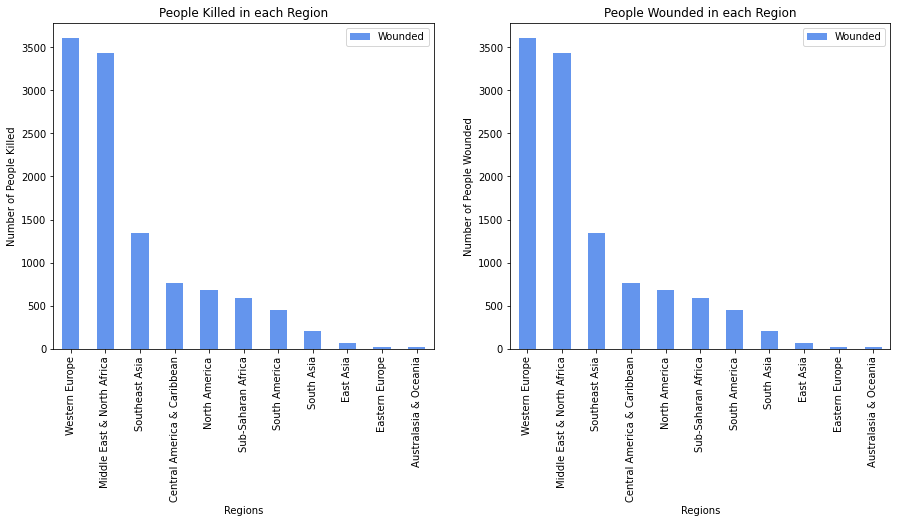

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
rk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#Wounded
rk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

In [ ]:
#Number of Attacks in each Country
ct=df["Country"].value_counts().head(10)
ct

United Kingdom    1755
United States     1527
Italy             1112
Spain             1042
El Salvador        963
Turkey             571
France             552
Colombia           531
Guatemala          339
Argentina          334
Name: Country, dtype: int64

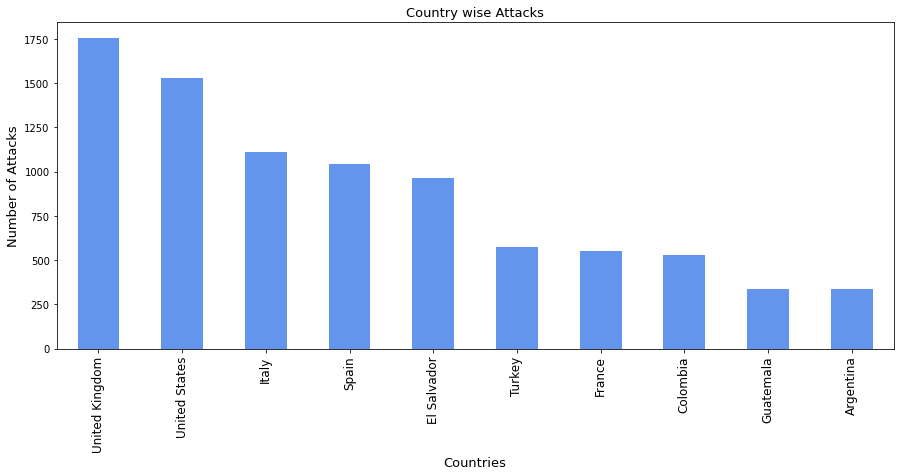

In [ ]:
ct.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [ ]:
#Total Casualties (Killed + Wounded) in each Country
cnc=df[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
cnc.head(10)

,Casualty
Country,
United Kingdom,3155.0
El Salvador,2463.0
Israel,1335.0
Philippines,1300.0
Iran,1275.0
Spain,1114.0
Italy,1042.0
United States,829.0
Lebanon,788.0


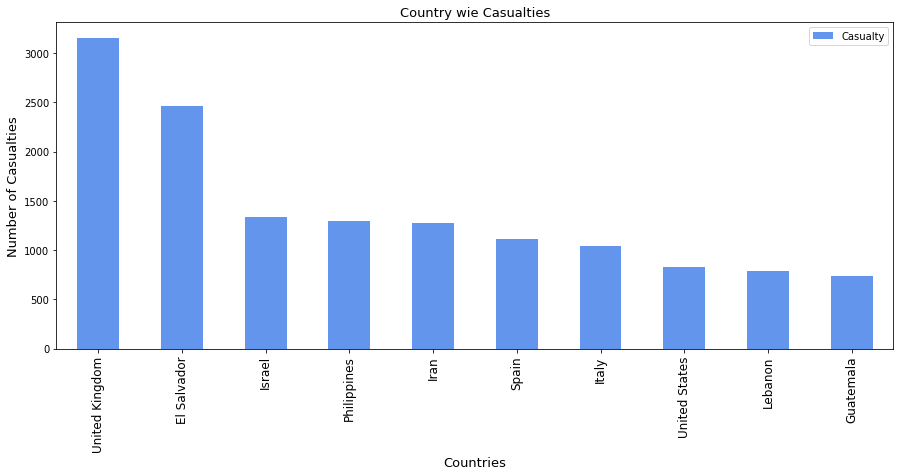

In [ ]:
cnc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wie Casualties",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [ ]:
#Killed in each country
cnk=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cnk.head(10)

,Killed
Country,
El Salvador,2102.0
United Kingdom,1833.0
Iran,581.0
Guatemala,553.0
Philippines,473.0
Spain,396.0
Nicaragua,349.0
Colombia,339.0
Argentina,328.0


In [ ]:
#Wounded in each country
cnw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
cnw.head(10)

,Wounded
Country,
United Kingdom,1322.0
Israel,1071.0
Philippines,827.0
Italy,743.0
Spain,718.0
Iran,694.0
United States,634.0
Lebanon,549.0
Turkey,407.0


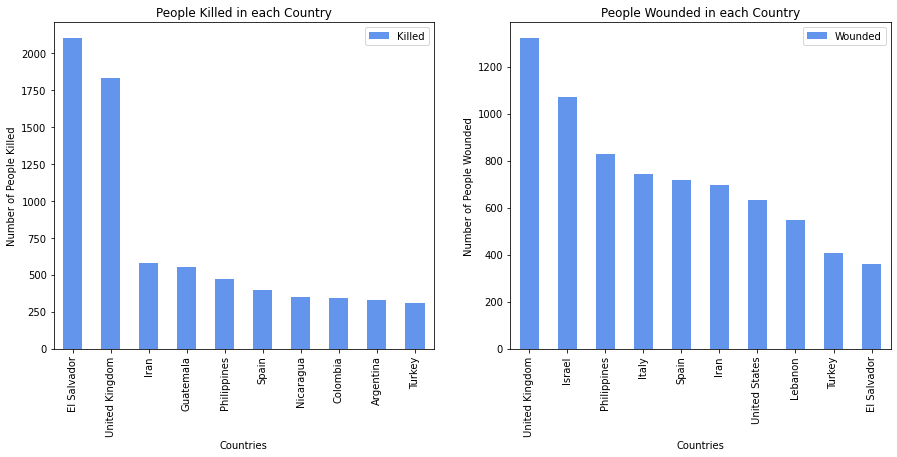

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

#Wounded
cnw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()

In [194]:
#City wise attack
city=df["City"].value_counts()[1:11]
city

Unknown           519
San Salvador      514
Rome              401
New York City     337
Paris             287
Madrid            211
Buenos Aires      206
Istanbul          177
Bogota            159
Guatemala City    156
Name: City, dtype: int64

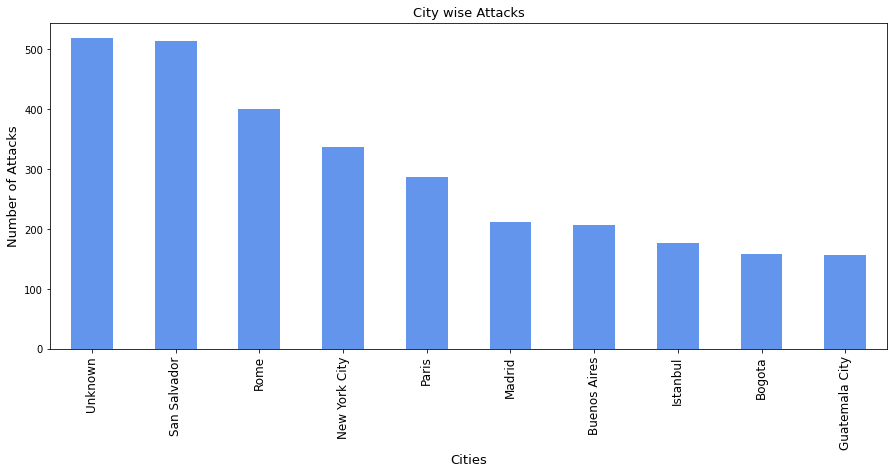

In [195]:
city.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()


In [196]:
#total casualties

cc=df[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
cc.head(10)

,Casualty
City,
Belfast,1212.0
Beirut,625.0
London,552.0
San Salvador,505.0
Jerusalem,497.0
Abadan,492.0
Madrid,381.0
Buenos Aires,360.0
Guatemala City,359.0


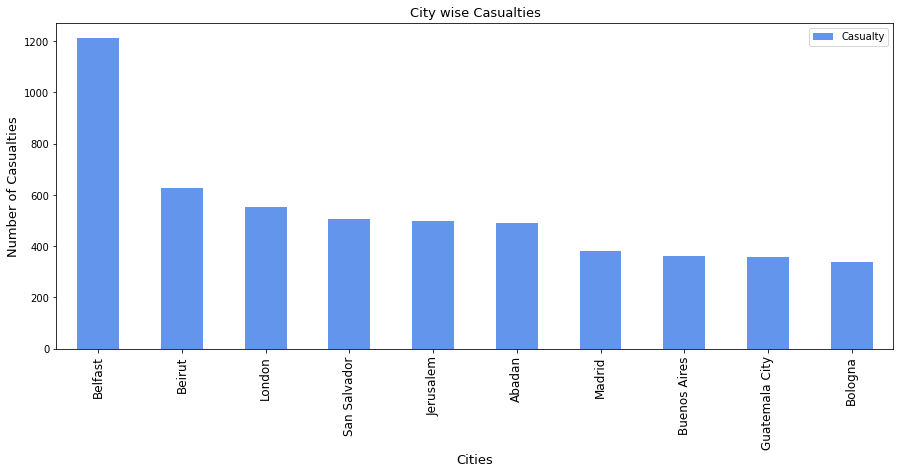

In [197]:
cc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Casualties",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [198]:
#Killed in each city

ck=df[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
ck.head(10)

,Killed
City,
Belfast,913.0
Abadan,429.0
San Salvador,374.0
Suchitoto,314.0
Buenos Aires,226.0
Guatemala City,223.0
Beirut,188.0
Aleppo,160.0
Rome,124.0


In [200]:
#Wounded in each city
cw=df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
cw.head(10)


,Wounded
City,
London,512.0
Jerusalem,458.0
Beirut,437.0
Belfast,299.0
Baghdad,293.0
Madrid,285.0
New York City,263.0
Tehran,250.0
Bologna,239.0


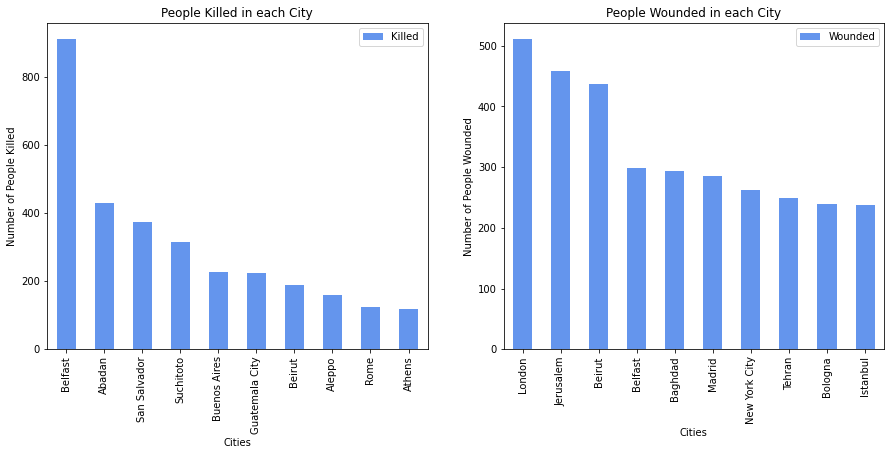

In [201]:

fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ck[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")

#Wounded
cw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show()

In [202]:
#Number of attacks by each group
grp=df["Group Name"].value_counts()[1:10]
grp

Irish Republican Army (IRA)                    1106
Basque Fatherland and Freedom (ETA)             532
Palestinians                                    227
Protestant extremists                           205
Sandinista National Liberation Front (FSLN)     197
Red Brigades                                    177
Ulster Volunteer Force (UVF)                    173
Left-Wing Militants                             170
People's Liberation Forces (FPL)                167
Name: Group Name, dtype: int64

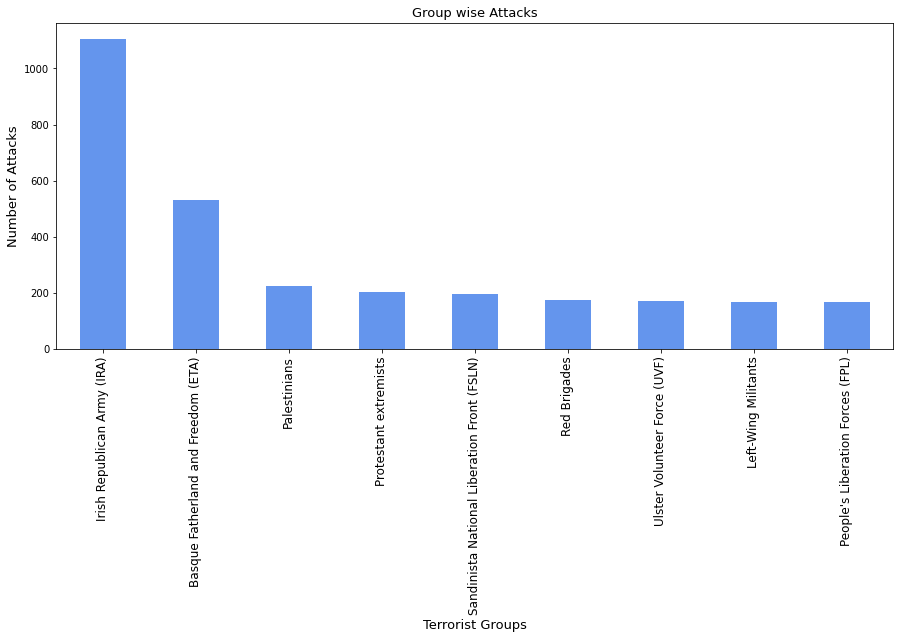

In [203]:
grp.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [204]:
#Total casualties
gc=df[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
gc.head(10)

,Casualty
Group Name,
Irish Republican Army (IRA),2297.0
Basque Fatherland and Freedom (ETA),786.0
Moro National Liberation Front (MNLF),773.0
Palestinians,704.0
Farabundo Marti National Liberation Front (FMLN),606.0
Mujahedin-e Khalq (MEK),457.0
Sandinista National Liberation Front (FSLN),366.0
Montoneros (Argentina),345.0
Armed Revolutionary Nuclei (NAR),330.0


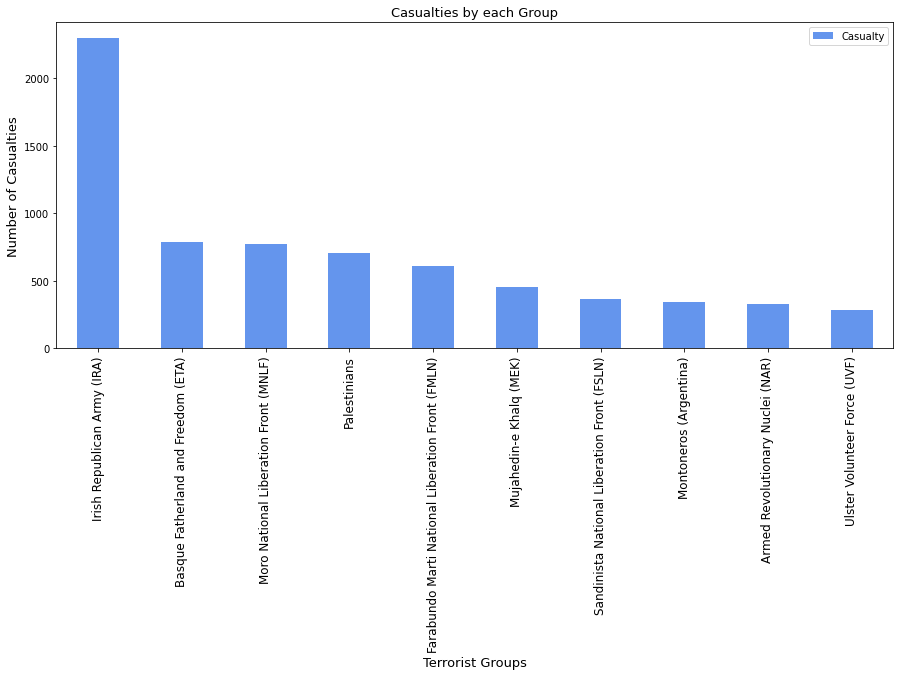

In [205]:
gc.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties by each Group",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [206]:
#Killed by each group

gk=df[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
gk.head(10)

,Killed
Group Name,
Irish Republican Army (IRA),1061.0
Farabundo Marti National Liberation Front (FMLN),467.0
Mujahedin-e Khalq (MEK),450.0
Moro National Liberation Front (MNLF),302.0
Ulster Volunteer Force (UVF),284.0
Basque Fatherland and Freedom (ETA),271.0
Sandinista National Liberation Front (FSLN),241.0
Protestant extremists,235.0
Montoneros (Argentina),212.0


In [207]:
#Wounded by each group
gw=df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
gw.head(10)

,Wounded
Group Name,
Irish Republican Army (IRA),1236.0
Palestinians,603.0
Basque Fatherland and Freedom (ETA),515.0
Moro National Liberation Front (MNLF),471.0
Armed Revolutionary Nuclei (NAR),242.0
Popular Front for the Liberation of Palestine (PFLP),219.0
Neo-Nazi extremists,215.0
Ahmad Jibril,160.0
Democratic Front for the Liberation of Palestine (DFLP),152.0


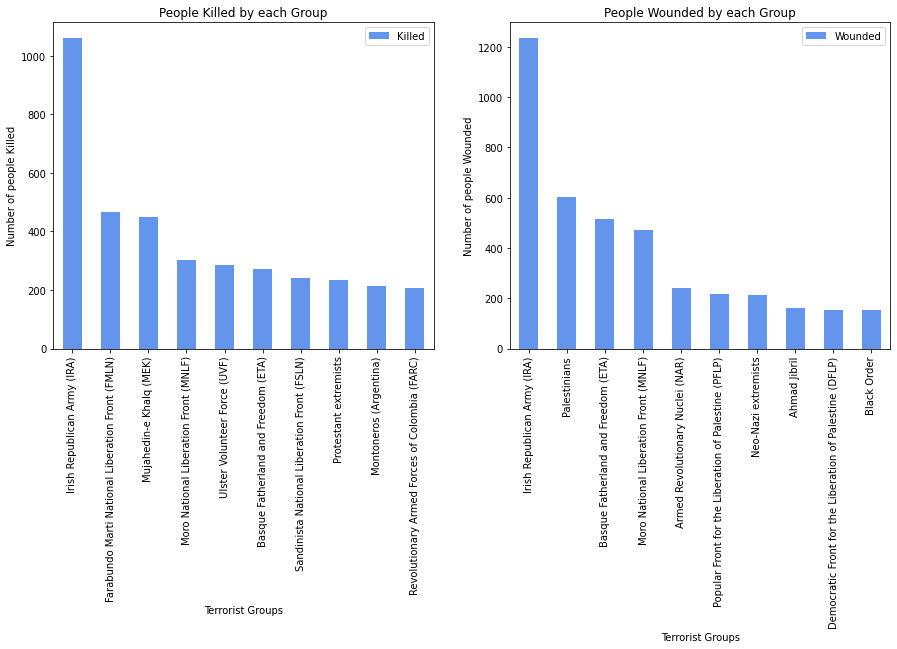

In [208]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
gk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of people Killed")

#Wounded
gw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of people Wounded")
plt.show()

In [209]:
#Types of attacks
at=df["Attack Type"].value_counts()
at

Bombing/Explosion                      5084
Assassination                          2467
Armed Assault                          1879
Facility/Infrastructure Attack         1227
Hostage Taking (Kidnapping)             641
Unknown                                 354
Hostage Taking (Barricade Incident)     211
Hijacking                                70
Unarmed Assault                          27
Name: Attack Type, dtype: int64

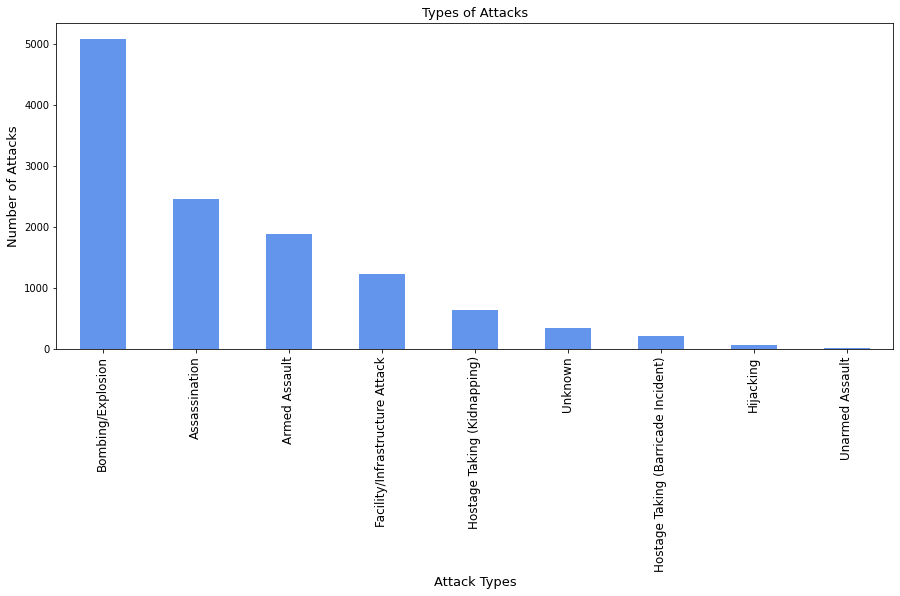

In [211]:

at.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Attacks",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [212]:
#casualties by these types of attacks
ac=df[["Attack Type","Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty",ascending=False)
ac

,Casualty
Attack Type,
Bombing/Explosion,11028.0
Armed Assault,5112.0
Assassination,3186.0
Facility/Infrastructure Attack,755.0
Unknown,571.0
Hostage Taking (Barricade Incident),471.0
Hostage Taking (Kidnapping),319.0
Hijacking,226.0
Unarmed Assault,26.0


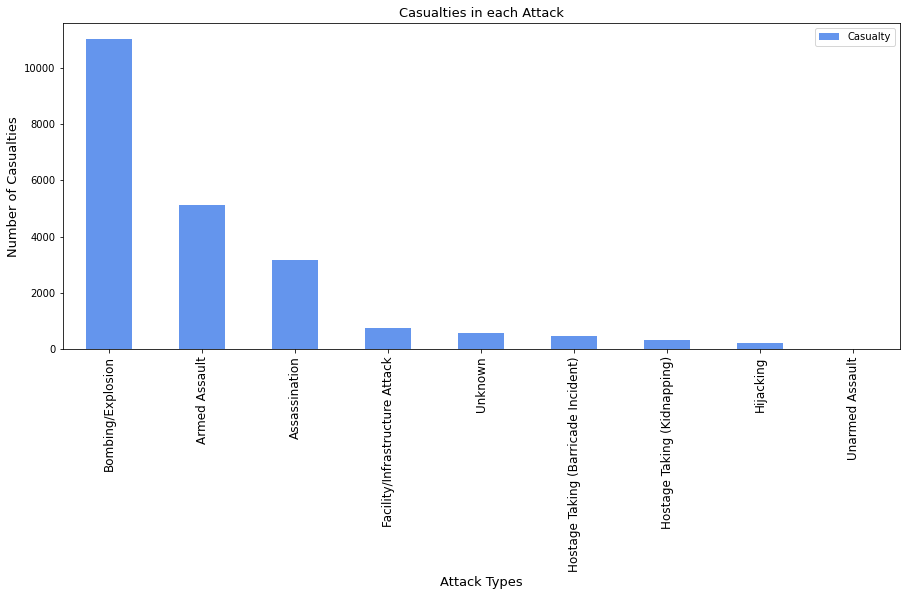

In [213]:
ac.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Attack",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [214]:
#Killed by attack type
ak=df[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False)
ak

,Killed
Attack Type,
Armed Assault,3598.0
Bombing/Explosion,2762.0
Assassination,2520.0
Facility/Infrastructure Attack,513.0
Unknown,453.0
Hostage Taking (Kidnapping),271.0
Hostage Taking (Barricade Incident),206.0
Hijacking,175.0
Unarmed Assault,16.0


In [216]:
#Wounded by attack types
aw=df[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False)
aw

,Wounded
Attack Type,
Bombing/Explosion,8266.0
Armed Assault,1514.0
Assassination,666.0
Hostage Taking (Barricade Incident),265.0
Facility/Infrastructure Attack,242.0
Unknown,118.0
Hijacking,51.0
Hostage Taking (Kidnapping),48.0
Unarmed Assault,10.0


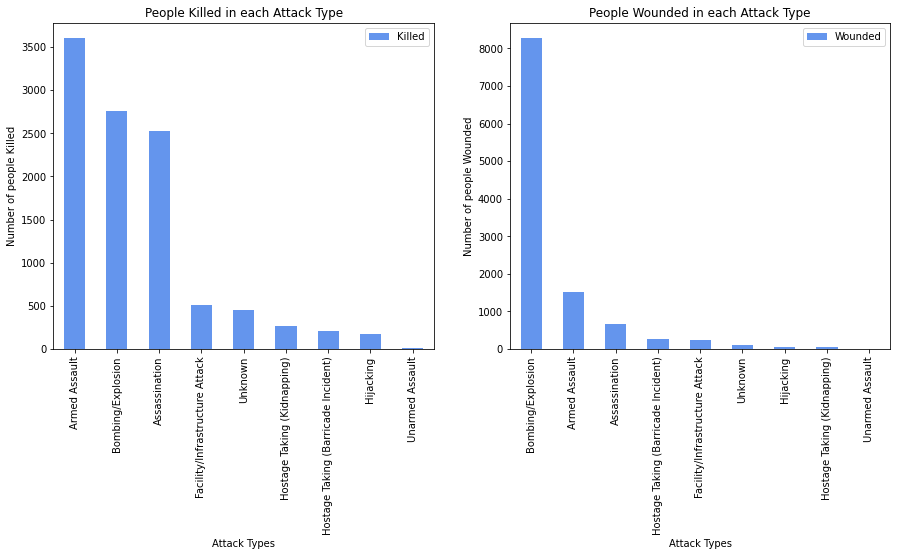

In [217]:

fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ak.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
aw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()